<h1>Técnicas Avanzadas de Aprendizaje Automático para la Detección de Intrusos en Sistemas Ciber-Físicos: Preprocesamiento de los datos</h1>

<h2>Introducción</h2>

En esta libreta se explican los pasos que se han de seguir para preprocesar los datos del dataset SWaT.

Se han seguido los pasos que se establecen en el artículo: **MADICS: A Methodology for Anomaly Detectionin Industrial Control Systems**, aunque tenía algunos fallos a nivel académico y han sido eliminados y solucionados.

Los contenidos que se tratarán en esta libreta son los siguientes:

- 1. Carga de los datos.
- 2. División de los datos.
- 3. Análisis exploratorio de los datos.
- 4. Preprocesamiento.
- 5. Guardando los datos preprocesados.

Para ejeuctar esta libreta, se ha necesitado de las siguientes librerías (`se ha utilizado la versión de Python 3.12.7`):

- `pandas`.
- `matplotlib`.
- `sklearn`.
- `seaborn`.
- `numpy`.
- `scipy`.
- `tqdm`.

<h2>1. Carga de los datos</h2>

Se importa la librería necesaria para cargar los datos:

In [1]:
import pandas as pd

In [2]:
ruta = "SWaT_Dataset_Normal.xlsx"

data_normal = pd.read_excel(ruta, engine='openpyxl')

c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
ruta = "SWaT_Dataset_Attack_v0.xlsx"

data_attack = pd.read_excel(ruta, engine='openpyxl')

c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Así mismo, se corrigen los errores de formato que presentan los datos ya cargados:

In [4]:
#renombrar las columnas ya que no se han cargado bien
data_normal.columns = [ 'Timestamp',	'FIT101',	'LIT101',	'MV101',	'P101',	'P102',	'AIT201',	'AIT202',	'AIT203',	'FIT201',	'MV201',	'P201',	'P202',	'P203',	'P204',	'P205',	'P206',	'DPIT301',	'FIT301',	'LIT301',	'MV301',	'MV302',	'MV303',	'MV304',	'P301',	'P302',	'AIT401',	'AIT402',	'FIT401',	'LIT401',	'P401',	'P402',	'P403',	'P404',	'UV401',	'AIT501',	'AIT502',	'AIT503',	'AIT504',	'FIT501',	'FIT502',	'FIT503',	'FIT504',	'P501',	'P502',	'PIT501',	'PIT502',	'PIT503',	'FIT601',	'P601',	'P602',	'P603',	'Normal/Attack']
data_attack.columns = [ 'Timestamp',	'FIT101',	'LIT101',	'MV101',	'P101',	'P102',	'AIT201',	'AIT202',	'AIT203',	'FIT201',	'MV201',	'P201',	'P202',	'P203',	'P204',	'P205',	'P206',	'DPIT301',	'FIT301',	'LIT301',	'MV301',	'MV302',	'MV303',	'MV304',	'P301',	'P302',	'AIT401',	'AIT402',	'FIT401',	'LIT401',	'P401',	'P402',	'P403',	'P404',	'UV401',	'AIT501',	'AIT502',	'AIT503',	'AIT504',	'FIT501',	'FIT502',	'FIT503',	'FIT504',	'P501',	'P502',	'PIT501',	'PIT502',	'PIT503',	'FIT601',	'P601',	'P602',	'P603',	'Normal/Attack']

In [5]:
#borrar la primera fila del dataset ya que se ha copiado mal y vuelven a aparecer el nombre de las variables:
data_normal= data_normal.drop(0, axis=0).reset_index(drop=True)
data_attack= data_attack.drop(0, axis=0).reset_index(drop=True)

In [6]:
#mostrar como se han cargado los datos para normal
data_normal.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 4:30:00 PM,0,124.3135,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256,1,1,1,Normal
1,22/12/2015 4:30:01 PM,0,124.392,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256,1,1,1,Normal
2,22/12/2015 4:30:02 PM,0,124.4705,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256,1,1,1,Normal
3,22/12/2015 4:30:03 PM,0,124.6668,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256,1,1,1,Normal
4,22/12/2015 4:30:04 PM,0,124.5098,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256,1,1,1,Normal


In [7]:
#mostrar como se han cargado los datos para attack
data_attack.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.886,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:03 AM,2.53435,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,28/12/2015 10:00:04 AM,2.56926,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


In [8]:
#observar que la variable clase no está en valor numérico, las pasamos para mayor comodidad:
print("En data_normal: ",data_normal["Normal/Attack"].unique())
print("En data attack: ",data_attack["Normal/Attack"].unique())

En data_normal:  ['Normal']
En data attack:  ['Normal' 'Attack' 'A ttack']


En el archivo de ataques aparece en la variable clase formatos incorrectos, se corrigen también:

In [9]:
data_normal['Normal/Attack'] = data_normal['Normal/Attack'].apply(lambda x: 0 if x == 'Normal' else 1)
data_attack['Normal/Attack'] = data_attack['Normal/Attack'].apply(lambda x: 0 if x == 'Normal' else 1)

In [10]:
#mostrar como se han cargado los datos para attack
data_normal.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 4:30:00 PM,0,124.3135,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256,1,1,1,0
1,22/12/2015 4:30:01 PM,0,124.392,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256,1,1,1,0
2,22/12/2015 4:30:02 PM,0,124.4705,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256,1,1,1,0
3,22/12/2015 4:30:03 PM,0,124.6668,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256,1,1,1,0
4,22/12/2015 4:30:04 PM,0,124.5098,1,1,1,251.9226,8.313446,312.7916,0,...,1,1,9.100231,0,3.3485,0.000256,1,1,1,0


Se muestra el tipo de los datos:

In [11]:
print("data_normal:\n", data_normal.dtypes)
print("data_attack:\n", data_attack.dtypes)

data_normal:
 Timestamp        object
FIT101           object
LIT101           object
MV101            object
P101             object
P102             object
AIT201           object
AIT202           object
AIT203           object
FIT201           object
MV201            object
P201             object
P202             object
P203             object
P204             object
P205             object
P206             object
DPIT301          object
FIT301           object
LIT301           object
MV301            object
MV302            object
MV303            object
MV304            object
P301             object
P302             object
AIT401           object
AIT402           object
FIT401           object
LIT401           object
P401             object
P402             object
P403             object
P404             object
UV401            object
AIT501           object
AIT502           object
AIT503           object
AIT504           object
FIT501           object
FIT502           object
FI

También se corrige el formato de los datos:

In [12]:
#convertir todas las columnas que deberían ser numéricas, exceptuando "Timestamp" que debería ser datetime
for columna in data_normal.select_dtypes(include=['object']).columns:
    if columna == "Timestamp":
        continue
    data_normal[columna] = pd.to_numeric(data_normal[columna], errors='coerce') #pasa la variable a tipo numeric

#hacer lo mismo con el conjunto de datos attack:
for columna in data_attack.select_dtypes(include=['object']).columns:

    if columna == "Timestamp":
        continue
    data_attack[columna] = pd.to_numeric(data_attack[columna], errors='coerce')


#convertir la columna Timestamp a formato fecha, tanto en normal como attack:
data_normal['Timestamp'] = data_normal['Timestamp'].str.strip()
data_normal['Timestamp'] = pd.to_datetime(
    data_normal['Timestamp'], 
    format='%d/%m/%Y %I:%M:%S %p',
    errors='coerce' #para gestionar errores
)

data_attack['Timestamp'] = pd.to_datetime(data_attack['Timestamp'])

C:\Users\Óscar\AppData\Local\Temp\ipykernel_4544\2504852891.py:23: UserWarning: Parsing dates in  %d/%m/%Y %I:%M:%S %p format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_attack['Timestamp'] = pd.to_datetime(data_attack['Timestamp'])


<h2>2. División de los datos</h2>

El conjunto de datos SWaT presenta los siguientes archivos:

- <b>SWaT_Dataset_Normal_v0</b>: Archivo que contiene los datos sin identificar el sensor. Tampoco tiene indicada la hora. No se usará para entrenar ni para comprobar resultados.

- <b>SWaT_Dataset_Normal</b>: Archivo anterior corregido: Añaden horas, minutos y segundos en la variable *Timestamp*. Nombran las columnas en función del sensor. Se usa este archivo como <u>train</u> y <u>validation</u> para que el modelo aprenda el comportamiento de datos normales.

- <b>SWaT_Dataset_Attack_v0</b>: Archivo que contiene los registros con ataques. Será el conjunto de <u>test</u>.

Para dividir los datos de validación y train,  se cogerá el primer 80% de los datos como train (para respetar el orden temporal) y el 20% restante final se usará como validación.

In [13]:
#variables predictoras del data_normal (X_train)
X_train_completo = data_normal.drop(columns = 'Normal/Attack')
#variable clase del data_normal (y_train)
y_train_completo = data_normal['Normal/Attack']

In [14]:
#indice de la división -> 80%
split_index = int(len(X_train_completo) * 0.8)
#para las variables predictoras
X_train = X_train_completo.iloc[:split_index]
X_val = X_train_completo.iloc[split_index:]
#para la variable clase
y_train = y_train_completo.iloc[:split_index]
y_val = y_train_completo.iloc[split_index:]

Se divide de igual manera el test:

In [15]:
#variables predictoras del data_attack (X_test)
X_test = data_attack.drop(columns = 'Normal/Attack')
#variable clase del data_attack (y_test)
y_test = data_attack['Normal/Attack']

<h2>3. Análisis exploratorio de los datos</h2>

Para comprobar la distribución de los datos, se muestran todos los valores de los sensores en función del tiempo:

In [16]:
import matplotlib.pyplot as plt

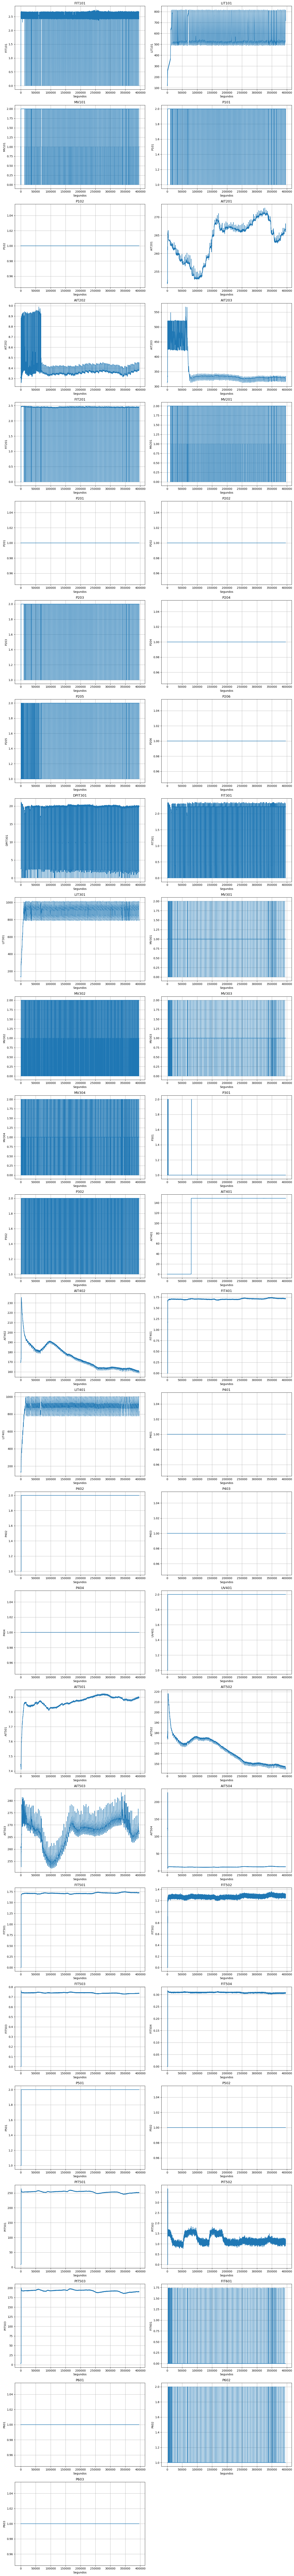

In [17]:
variables_predictoras = ['FIT101',	'LIT101',	'MV101',	'P101',	'P102',	'AIT201',	'AIT202',	'AIT203',	'FIT201',	'MV201',
                        'P201',	'P202',	'P203',	'P204',	'P205',	'P206',	'DPIT301',	'FIT301',	'LIT301',	'MV301',	'MV302',
                        'MV303',	'MV304',	'P301',	'P302',	'AIT401',	'AIT402',	'FIT401',	'LIT401',	'P401',	'P402',	'P403',
                        'P404',	'UV401',	'AIT501',	'AIT502',	'AIT503',	'AIT504',	'FIT501',	'FIT502',	'FIT503',	'FIT504',
                        'P501',	'P502',	'PIT501',	'PIT502',	'PIT503',	'FIT601',	'P601',	'P602',	'P603']

filas = -(-len(variables_predictoras) // 2)  #numero de columnas = 3
fig, axes = plt.subplots(filas, 2, figsize=(15, 5 * filas))
axes = axes.flatten()

#pasar fechas a segundos
X_train_aux = pd.DataFrame()
X_train_aux['Seconds'] = (X_train['Timestamp'] - X_train['Timestamp'].iloc[0]).dt.total_seconds()


#graficar las variables predictoras
for i, variable in enumerate(variables_predictoras):
    axes[i].plot(X_train_aux['Seconds'], X_train[variable], label=variable)
    axes[i].set_title(variable)
    axes[i].set_xlabel('Segundos')
    axes[i].set_ylabel(variable)
    axes[i].grid(True)

#quitar gráficos vacíos
for j in range(len(variables_predictoras), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

En un primer analáisis, se puede observar que hay ciertas variables que no cambian de valor (P601, P603, P502, P102, P201, P202, P204, P206, P401, P403 y P404). También se aprecia cierta estacionalidad.

También se observa que se da un tiempo de puesta en marcha del sistema. Para que el modelo sólo aprenda los valores normales de los sensores, se quita el tiempo en que tarda en estabilizarse, que queda definido por el tiempo máximo de los sensores <b>AIT202</b> y <b>AIT401</b> (unos 100000 segundos):

In [18]:
#eliminar los primeros 100,000 registros
X_train_modified = X_train.iloc[100000:]
y_train_modified = y_train.iloc[100000:]

<h3>3.1. Comprobación de valores faltantes</h3>

A continuación, se comprueban si existen valores faltantes:

In [19]:
X_train.isnull().sum()

Timestamp    0
FIT101       0
LIT101       0
MV101        0
P101         0
P102         0
AIT201       0
AIT202       0
AIT203       0
FIT201       0
MV201        0
P201         0
P202         0
P203         0
P204         0
P205         0
P206         0
DPIT301      0
FIT301       0
LIT301       0
MV301        0
MV302        0
MV303        0
MV304        0
P301         0
P302         0
AIT401       0
AIT402       0
FIT401       0
LIT401       0
P401         0
P402         0
P403         0
P404         0
UV401        0
AIT501       0
AIT502       0
AIT503       0
AIT504       0
FIT501       0
FIT502       0
FIT503       0
FIT504       0
P501         0
P502         0
PIT501       0
PIT502       0
PIT503       0
FIT601       0
P601         0
P602         0
P603         0
dtype: int64

En este problema en concreto, parece que no existen valores faltantes. En el caso de que los hubiese, existen varias formas de imputar los valores nulos:

- Imputar por la media o por la mediana.
- Eliminar los ejemplos dañados.
- Marcar los datos faltantes como valores no válidos.

Aunque estas técnicas suelen demostrar buenos resultados de manera general, en un problema de ICS (Industrial Control System), las dos primeras opciones no tienen mucho sentido debido a las siguientes razones:

- Muchas de las variables son categóricas (por ejemplo, un 0 para válvula cerrada y un 1 para válvula abierta), por lo que imputar por la media no tiene sentido en este caso.
- La ausencia de valores faltantes puede ser un patrón de ataque, por lo que no conviene eliminarlos.

Tras esta explicación, se elige imputar con la tercera opción: marcar los datos faltantes como valores no válidos. Aunque este dataset no presente este tipo de valores, se añade una columna que se llamará <b>Valid</b>, en la que un 1 representará que el registro no presenta valores faltantes y 0 en caso contrario.

In [20]:
X_train_modified['Valid'] = X_train.notna().all(axis=1).astype(int)
X_val['Valid'] = X_val.notna().all(axis = 1).astype(int)
X_test['Valid'] = X_test.notna().all(axis=1).astype(int)
#hacer describe de Valid para ver la varianza, por si hay no validos
X_train_modified[['Valid']].describe()


C:\Users\Óscar\AppData\Local\Temp\ipykernel_4544\3094619646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_modified['Valid'] = X_train.notna().all(axis=1).astype(int)
C:\Users\Óscar\AppData\Local\Temp\ipykernel_4544\3094619646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['Valid'] = X_val.notna().all(axis = 1).astype(int)


,Valid
count,296000.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


<h3>3.2. Codificación de características</h3>

En este paso, se preparan las características categóricas para que poder aplicar nuestros modelos de ML. Para codificar las variables categóricas, lo más recomendando es aplicar One-Hot Encoding (<b>OHE</b>), convirtiendo valores categóricos en características binarias.

Para comprobar si el dataset presenta variables categóricas, se analizan los valores únicos de cada variable:

In [21]:
for col in X_train_modified.columns:
    unique_values = X_train_modified[col].nunique()
    print(f"Columna {col} tiene {unique_values} valores únicos.")

Columna Timestamp tiene 296000 valores únicos.
Columna FIT101 tiene 2157 valores únicos.
Columna LIT101 tiene 6704 valores únicos.
Columna MV101 tiene 3 valores únicos.
Columna P101 tiene 2 valores únicos.
Columna P102 tiene 1 valores únicos.
Columna AIT201 tiene 463 valores únicos.
Columna AIT202 tiene 354 valores únicos.
Columna AIT203 tiene 948 valores únicos.
Columna FIT201 tiene 1972 valores únicos.
Columna MV201 tiene 3 valores únicos.
Columna P201 tiene 1 valores únicos.
Columna P202 tiene 1 valores únicos.
Columna P203 tiene 2 valores únicos.
Columna P204 tiene 1 valores únicos.
Columna P205 tiene 2 valores únicos.
Columna P206 tiene 1 valores únicos.
Columna DPIT301 tiene 3973 valores únicos.
Columna FIT301 tiene 4367 valores únicos.
Columna LIT301 tiene 4554 valores únicos.
Columna MV301 tiene 3 valores únicos.
Columna MV302 tiene 3 valores únicos.
Columna MV303 tiene 3 valores únicos.
Columna MV304 tiene 3 valores únicos.
Columna P301 tiene 1 valores únicos.
Columna P302 tie

Se considerarán categóricas las variables que tengan menos de 10 valores únicos:

In [22]:
#identificar columnas categóricas
categorical_columns = [col for col in variables_predictoras if X_train_modified[col].nunique() <= 10]
print("Columnas categóricas:", categorical_columns)

Columnas categóricas: ['MV101', 'P101', 'P102', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'P401', 'P402', 'P403', 'P404', 'UV401', 'P501', 'P502', 'P601', 'P602', 'P603']


Posteriormente,  se la codificación **One-Hot Encoding** (a la vez que la normalización).

<h3>3.3. Escalado de características contínuas</h3>

El siguiente paso es escalar las características. Hay dos opciones:

- <b>MinMaxScaler</b>: Calcula el mínimo y máximo por columna. Este escalador no distorsiona la forma del dataset.
- <b>StandardScaler</b>: Se transforman los datos para que tengan media 0 y una desviación estándar 1.

Se decide normalizar por StandarScaler. Se deja instanciado:

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

<h2>4. Preprocesamiento</h2>

En esta sección se estudian las diferentes características del dataset para ver si son importantes. Además, se extraerán características de mayor nivel que aportarán información de mayor calidad a los datos.

<h3>4.1. Estudiando la correlación entre variables</h3>

En el proceso de introducir los datos de los sensores al archivo .xlsx se podría haber realizado algo de data leakage, por lo que debe ser estudiarlo. En los datasets ICS es frecuente que las variables estén correlacionadas. Por ejemplo, en este sistema, cuando el tanque de agua está lleno, la válvula que lo llena se cierra. Este tipo de relaciones entre variables es normal, pero hay que estudiar la correlación entre variables específicas y la variable clase en búsqueda de una posible fuga de datos. Si se encuentran variables muy relacionadas con la clase y se piensa que es debido a la fuga, se debe destacar dicha característica. En el artículo en el que se basa este trabajo se recomienda usar el <b>Coeficiente de Correlación de Pearson</b>, considerando una correlación alta aquellos valores por encima de <b>0.9</b>. La fórmula de la correlación es la siguiente:

$$
r = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}
$$

Donde:

- $r$ es el coeficiente de correlación de Pearson, que mide la relación lineal entre dos variables,
- $n$ es el número de observaciones.,
- $x_i$ es el valor de la $i$-ésima observación de la variable $x$,
- $\bar{x}$ es la media de la variable $x$, calculado como $\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$,
- $y_i$ es el valor de la $i$-ésima observación de la variable $y$ u
- $\bar{y}$ es la media de la variable $y$, calculado como $\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$.
 

Se añaden las depedencias necesarias para realizar la correlación gráficamente:

In [25]:
import seaborn as sns
import numpy as np

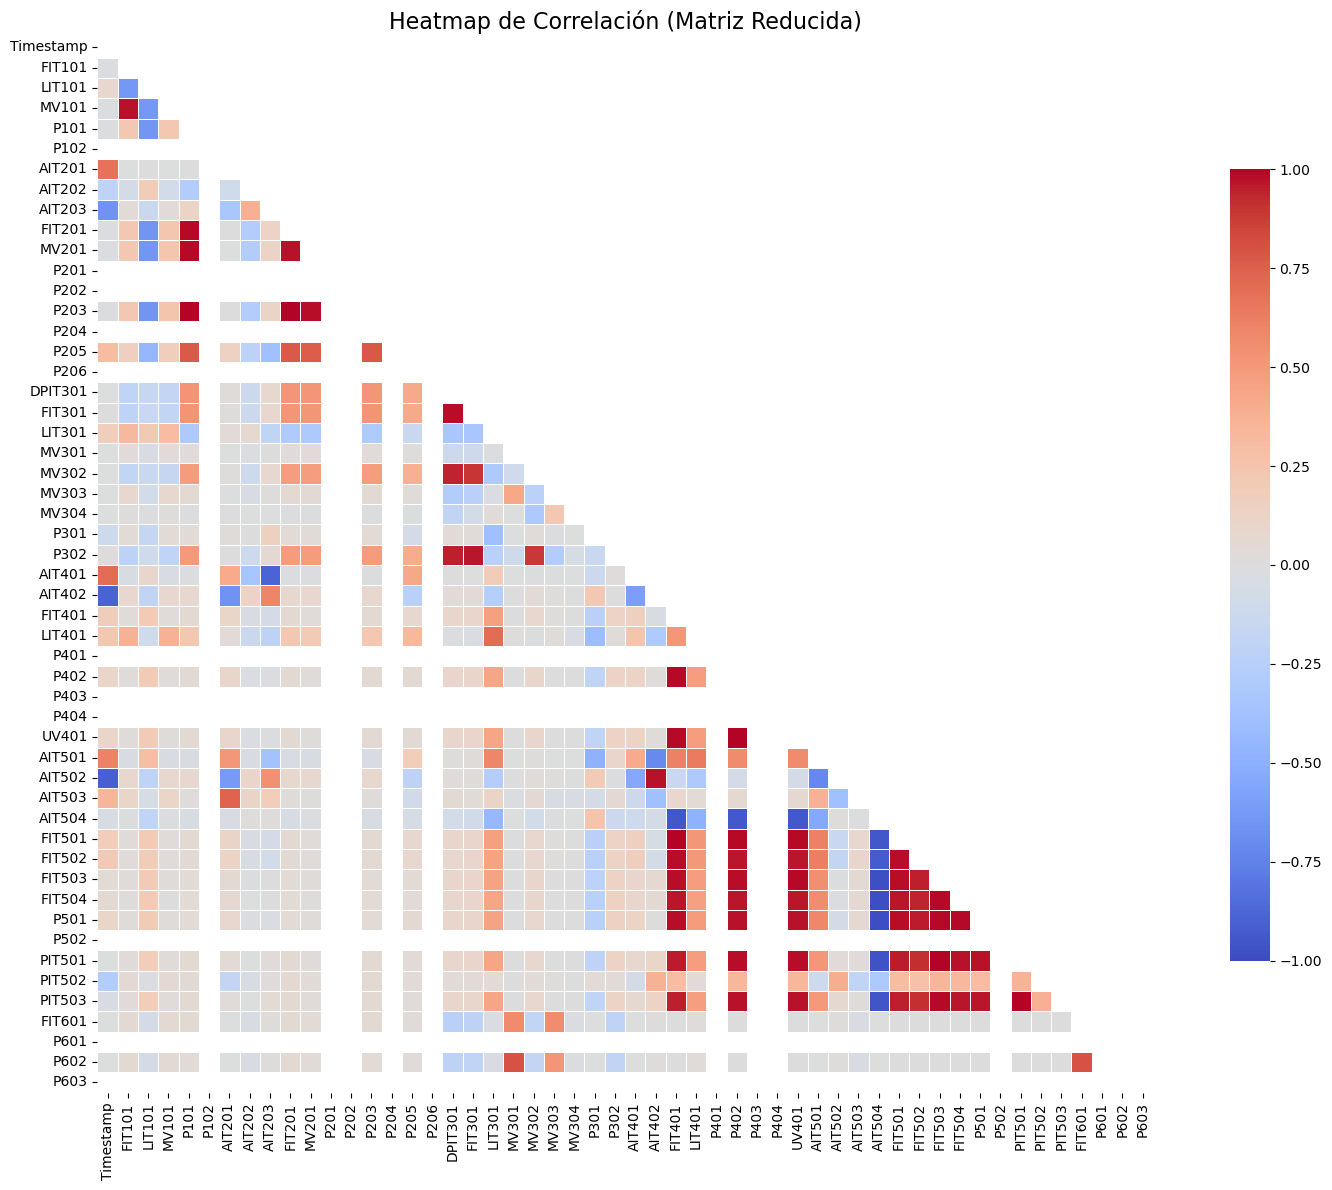

In [26]:
#matriz de correlación
correlation_matrix = X_train.corr()

#para la mitad superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(16, 12))

sns.heatmap(correlation_matrix, 
            mask=mask,                  
            cmap="coolwarm",
            vmin=-1, vmax=1,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.75},
            annot=False)

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.title("Heatmap de Correlación (Matriz Reducida)", fontsize=16)
plt.tight_layout()
plt.show()

Se observa que algunas variables presentan bastante correlación entre ellas. Esto es normal en los ICS debido a la relación entre las partes de los sistemas.

<h3>4.2. Eliminar características con baja varianza</h3>

Ahora es momento de observar si ciertas variables predictoras no cambian en todo el dataset para eliminarlas. Anteriormente, se había concluido que algunas variables sólo tenían un valor único. Se observa aquellas variables que no cambian de valor comprobando si tienen <b>varianza = 0</b>:

In [27]:
columnas_sin_timestamp = [col for col in X_train_modified.columns if col != 'Timestamp']
#varianza de cada variable
varianzas = X_train_modified[columnas_sin_timestamp].var()

variables_con_varianza_cero = [col for col, varianza in varianzas.items() if varianza == 0]
variables_con_varianza_cero

['P102',
 'P201',
 'P202',
 'P204',
 'P206',
 'P301',
 'P401',
 'P402',
 'P403',
 'P404',
 'UV401',
 'P501',
 'P502',
 'P601',
 'P603',
 'Valid']

Se quitan estas variables del dataset:

In [28]:
X_train_modified = X_train_modified.drop(columns=variables_con_varianza_cero)

**Nota**: Como se sabe que cada fila corresponde a un segundo, se quita la columna Timestamp porque según el orden de las variables se respeta el orden temporal del dataset:

In [29]:
X_train_modified = X_train_modified.drop('Timestamp', axis=1)

Se realiza lo mismo con los datos de validación y test:

In [30]:
X_val_modified = X_val.drop(columns=variables_con_varianza_cero)
X_test_modified = X_test.drop(columns=variables_con_varianza_cero)
X_val_modified = X_val_modified.drop('Timestamp', axis=1)
X_test_modified = X_test_modified.drop('Timestamp', axis=1)

<h3>4.3. Extracción de variables</h3>

La extracción de características es un proceso que consiste en usar conocimiento experto para extrar características más importantes del dataset original. En esta subsección se muestran las tareas que se deben realizar para conseguirlas. Hay que tener en cuenta que sos ICS realizan muchas tareas repetitivas.


Por ejemplo, un ICS que controla y monitorea un tanque de agua debe considerar los límites inferiores y superiores del tanque para abrir y cerrar consecuentemente las válvulas de entrada y salida de agua. Esta acción se repite con el tiempo, a medida que el agua alcanza sus límites inferiores y superiores. Estas acciones repetitivas se reflejan en los registros a partir de los cuales se crean los conjuntos de datos. Para determinar estas acciones repetitivas, en forma de características, se recomienda extraer características utilizando la autocorrelación y la Transformada de Fourier (FT).

<h4>4.3.1. Calcular la autocorrelación</h4>

La primera tarea es usar una función de autocorrelación para extraer características de orden superior. La autocorrelación es la medida de cuán similar es una serie de tiempo dada a sí misma en diferentes lapsos de tiempo, en función del retardo 
𝑘 (lag). En este caso, la correlación se aplica en una ventana temporal de longitud 
𝑊. La definición formal de la autocorrelación se muestra en la ecuación:

$$
\text{autocorr}_{x_{w,k}} = 
\frac{
\sum_{i=w-W+1}^{w-k} \left( x_i - \bar{x} \right) \left( x_{i+k} - \bar{x} \right)
}{
\sum_{i=w-W+1}^{w} \left( x_i - \bar{x} \right)^2
}
$$

Donde $x_w$ denota el valor de $x$ en un instante $w$ y $\bar{x}$ es la media de los valores de $x$ en la ventana. Una de las múltiples aplicaciones prácticas de la autocorrelación es encontrar patrones repetitivos. Por lo tanto, se expera extraer características relacionadas con la repetición de patrones de señales en sensores y actuadores.

Se implementa la función que calculará la autocorrelación. Para ello, se usa la función correlate de la librería **ScyPy**, que calcula la correlación cruzada para dos señales. Sin embargo, si se calcula la correlación entre la misma señal (misma variable), se obtiene la autocorrelación.



In [31]:
from scipy.signal import correlate

In [32]:
def calcula_autocorrelacion(variable):
    """
    calcula_autocorrelacion: devuelve la autocorrelacion para una variable.


    Parámetros:
    variable: señal de la que se quiere calcular la autocorrelación.

    Devuelve:
    Valor de la autocorrelación.

    Notas:
    mode='full' asegura que se calcule la correlación completa (no solo los valores centrados)
    Se resta la media de la señal x para asegurar que la autocorrelación esté centrada, lo que significa que la función
    se basa en el valor medio de la señal, evitando de esta manera sesgos.
    """
    return correlate(variable, variable, mode='full')[len(variable) - 1:]

<h4>4.3.2. Calcular la Transformada de Fourier discreta (DFT)</h4>

La siguiente tarea que se debe realizar es pasar del dominio del tiempo de una señal al dominio de la frecuencia. Lo más recomendado para realizar este paso es usar La Transformada de Fourier discreta, que sigue la siguiente fórmula:
$$
\text{DFT}_{x_{w,k}} = \sum_{j=w-W+1}^{w} x_j e^{-2\pi i \frac{k(j - (w-W+1))}{W}}
$$

Dónde $x_w$ es la muestra $w$ de $x$ y $W$ es el número total de muestras.

Se define a continuación la función para calcular la DFT usando la función fft que ofrece la librería **SciPy**, que devuelve la Transformada de Fourier Discreta de una secuencia de números reales.

In [33]:
from scipy.fftpack import fft

In [34]:
def calcula_dft(variable):
    """
    calcula_dft: devuelve la Transformada de Fourier Discreta para una variable pasada como parámetro.

    Parámetros:
    variable: señal de la que queremos calcular la dft.

    Devuelve:
    valor de la Transformada de Fourier Discreta para dicha variable.

    Notas:
    devuelve el valor absoluto.
    """
    return np.abs(fft(variable))

<h4> 4.3.3. Añadir las nuevas características a los datos</h4>

Ahora que se sabe cómo calcular las características de alto nivel, se tiene que realizar los cálculos correspondientes y añadirlos a los datos de train, test y validación.

Para añadir las nuevas características, se calcula la Autocorrelación y la Transformada para cada instancia i de las variables del dataset seguido de las W (tamaño de ventana) instancias posteriores ($\sum_{i}^{N} (i + W$)). De esta manera, se calculan estos valores para un vector del tamaño de la ventana en función de la fila en la que se encuentre, del cual se sacan ciertas estadísticas como **la media**, **la desviación estándar**, **el mínimo**, **el máximo** y **el rango**.

Por ejemplo, para la primera fila de la variable **FIT101**, se generarían las variables *FIT101\_autocorr\_mean , FIT101\_autocorr\_std , FIT101\_autocorr\_min, FIT10\_autocorr\_max , FIT101\_autocorr\_range, FIT101\_dft\_mean , FIT101\_dft\_std , FIT101\_dft\_min, FIT101\_dft\_max , FIT101\_dft\_range* que se calculan del vector $FIT101[1-121]$, obteniendo así un total de 10 nuevas variables por característica contínua del dataset.

In [36]:
from tqdm import tqdm

In [37]:
def genera_variables(data, W):
    """
    genera_variables: recibe un dataset con un tamaño de ventana W y devuelve un nuevo dataset con sus valores de autocorrelación y dft para esa ventana

    Parámetros:
    data: dataset sobre el quese quiere extraer las características de autocorrelación y dft.
    W: tamaño de la ventana

    Devuelve:
    dataset con las variables generadas para la ventana pasada como parámetro.
    """
    num_rows = len(data)
    num_features = len(data.columns) * 10 #num_colum = columnas actuales * 10 (5 de autocorrelacion y 5 de dft)

    #nombres de las columnas: nombreVar_autocorr/dft_metrica
    feature_columns = []
    for column in data.columns:
        feature_columns.extend([
            f'{column}_autocorr_mean', f'{column}_autocorr_std', f'{column}_autocorr_min',
            f'{column}_autocorr_max', f'{column}_autocorr_range',
            f'{column}_dft_mean', f'{column}_dft_std', f'{column}_dft_min',
            f'{column}_dft_max', f'{column}_dft_range'
        ])

    #dataframe auxiliar
    feature_df = pd.DataFrame(np.zeros((len(data), num_features)), columns=feature_columns)

    for i in tqdm(range(num_rows), desc="Procesando filas"):
        start = i
        end = min(start + W, num_rows) #en las últimas 120 columnas solo debe coger la fila final como ventana 
        window = data.iloc[start:end]  

        vector_añadir = []  

        for column in data.columns:
            signal = window[column].astype(float).values #conversión a float para evitar problemas de formato 

            #calcular autocorrelación con la función correspondiente y sus estadísticas
            auto_corr = calcula_autocorrelacion(signal)
            vector_añadir.extend([np.mean(auto_corr), np.std(auto_corr), np.min(auto_corr),
                                  np.max(auto_corr), np.max(auto_corr) - np.min(auto_corr)])

            #calcular dft con la función correspondiente y sus estadísticas
            dft = calcula_dft(signal)
            vector_añadir.extend([np.mean(dft), np.std(dft), np.min(dft),
                                  np.max(dft), np.max(dft) - np.min(dft)])

        #para comprobar que se añaden el número justo de columnas
        if len(vector_añadir) == num_features:
            feature_df.iloc[i] = vector_añadir
        else:
            print(f"Error en la fila {i}: El número de elementos en vector_añadir no coincide con num_features")

    return feature_df


Se ejecuta la función que hemos creado, con W (tamaño de ventana) = 120. Algo que se debe tener en cuenta es que no tiene mucho sentido calcular la Autocorrelación y la Transformada de Fourier Discreta para variables categóricas, por lo que sólo se realiza el proceso para aquellas que sean características contínuas:

In [ ]:
#calcular las variables categóricas una vez hemos modificado X_train:
categorical_columns_modified = [col for col in X_train_modified.columns if X_train_modified[col].nunique() <= 5]
print("Columnas categóricas:", categorical_columns_modified)

Columnas categóricas: ['MV101', 'P101', 'MV201', 'P203', 'P205', 'MV301', 'MV302', 'MV303', 'MV304', 'P302', 'P602']


In [40]:
data_cleaned_train = X_train_modified.drop(categorical_columns_modified, axis=1)
data_cleaned_val = X_val_modified.drop(categorical_columns_modified, axis=1)
data_cleaned_test = X_test_modified.drop(categorical_columns_modified, axis=1)

In [ ]:
W = 120
data = data_cleaned_train
feature_df = genera_variables(data, W)
#cambiar el índice para que empiece en 100000 (ya que nosotros quitar las primeras 100000 instancias)
feature_df.index = pd.RangeIndex(start=100000, stop=100000 + len(feature_df), step=1)
#unir los dataframes
full_dataset_train = pd.concat([data, feature_df], axis=1)

Procesando filas: 100%|██████████| 296000/296000 [34:41<00:00, 142.21it/s]


Se sigue el mismo procedimiento para validación y test:

In [ ]:
#validacion
data = data_cleaned_val
feature_df = genera_variables(data, W)
#cambiar el índice para que empiece en 396000 (dónde empieza la validación)
feature_df.index = pd.RangeIndex(start=396000, stop=396000 + len(feature_df), step=1)
#unir los dataframes
full_dataset_val = pd.concat([data, feature_df], axis=1)

Procesando filas: 100%|██████████| 99000/99000 [11:39<00:00, 141.51it/s]


In [ ]:
#test
data = data_cleaned_test
feature_df = genera_variables(data, W)
data = data.reset_index(drop=True)
#asegurarse que tengan el mismo índice para evitar problemas
data = data.reset_index(drop=True)
feature_df = feature_df.reset_index(drop=True)
#unir los dataframes
full_dataset_test = pd.concat([data, feature_df], axis=1)

Procesando filas: 100%|██████████| 449919/449919 [53:01<00:00, 141.42it/s]


A continuación se une el dataset anterior con el dataset correspondiente a las variables categóricas:

In [ ]:
numerical_columns_modified = [col for col in X_train_modified.columns if X_train_modified[col].nunique() > 5]
print("Columnas contínuas:", numerical_columns_modified)
data_cat_train = X_train_modified.drop(numerical_columns_modified, axis=1)
data_cat_val = X_val_modified.drop(numerical_columns_modified, axis=1)
data_cat_test = X_test_modified.drop(numerical_columns_modified, axis=1)
#reiniciar indíces en el test para no tener problemas al unirlos
data_cat_test= data_cat_test.reset_index(drop=True)

Columnas contínuas: ['FIT101', 'LIT101', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'DPIT301', 'FIT301', 'LIT301', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'PIT501', 'PIT502', 'PIT503', 'FIT601']


In [ ]:
#unir train y validation
full_dataset_train_mod = pd.concat ([data_cat_train, full_dataset_train], axis = 1)
full_dataset_val_mod = pd.concat ([data_cat_val, full_dataset_val], axis = 1)
full_dataset_test_mod = pd.concat ([data_cat_test, full_dataset_test], axis = 1)

Antes de pasar con el siguiente paso es momento de escalar los datos (tanto contínuos como categóricos) por convencia. Se ha hecho en este paso para obtener la autocorrelación y la DFT de los datos originales.

Como se ha mencionado anteriormente, sobre las columnas categóricas se aplicará **One-Hot Enconding**, y sobre las variables contínuas se usará **StandardScaler**:

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#calcular de nuevo las variables numéricas (para obtener las características extraídas)
numerical_columns_modified = [col for col in full_dataset_train.columns if full_dataset_train[col].nunique() > 5]

In [48]:
preprocesamiento = ColumnTransformer(
    transformers = [
        ("continuas", scaler, numerical_columns_modified),
        ("categoricas", OneHotEncoder(handle_unknown = "ignore"), categorical_columns_modified)
        ]
)

Realizar el fit con los datos de train para evitar fuga de datos al escalar:

In [49]:
preprocesamiento.fit_transform(full_dataset_train_mod)

array([[ 0.54609189, -0.50950522, -2.79726109, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.53179154, -0.51293379, -2.79726109, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.52225827, -0.51156236, -2.79726109, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-1.60261895,  1.08900684,  0.22865152, ...,  1.        ,
         1.        ,  0.        ],
       [-1.60261895,  1.08523498,  0.22865152, ...,  1.        ,
         1.        ,  0.        ],
       [-1.60261895,  1.08043498,  0.22865152, ...,  1.        ,
         1.        ,  0.        ]])

Ahora, para pasar a dataset el resultado obtenido, se debe obtener el nombre de las columnas categóricas ya que han cambiado de nombre al aplicar One-Hot-Encoding:

In [50]:
X_train_transformed = preprocesamiento.transform(full_dataset_train_mod)
X_val_transformed = preprocesamiento.transform(full_dataset_val_mod)
X_test_transformed = preprocesamiento.transform(full_dataset_test_mod)

In [ ]:
#extraer el OneHotEncoder del ColumnTransformer
ohe = preprocesamiento.named_transformers_['categoricas']
#guardar en una variable los nombres de las nuevas columnas
ohe_feature_names = ohe.get_feature_names_out(categorical_columns_modified)
ohe_feature_names

array(['MV101_0', 'MV101_1', 'MV101_2', 'P101_1', 'P101_2', 'MV201_0',
       'MV201_1', 'MV201_2', 'P203_1', 'P203_2', 'P205_1', 'P205_2',
       'MV301_0', 'MV301_1', 'MV301_2', 'MV302_0', 'MV302_1', 'MV302_2',
       'MV303_0', 'MV303_1', 'MV303_2', 'MV304_0', 'MV304_1', 'MV304_2',
       'P302_1', 'P302_2', 'P602_1', 'P602_2'], dtype=object)

Ahora toca transformar los datos normalizados y codificados a un dataframe:

In [52]:
final_cols = list(numerical_columns_modified) + list(ohe_feature_names)

df_train_final = pd.DataFrame(X_train_transformed, columns=final_cols)
df_val_final = pd.DataFrame(X_val_transformed, columns=final_cols)
df_test_final = pd.DataFrame(X_test_transformed, columns=final_cols)

<h2>5. Guardando los datos preprocesados.</h2>

Una vez se han seleccionado las mejores variables y se han generado nuevas características de mayor nivel, hay que exportar los datos para poder entrenar el modelo.

Se añaden y_train a x_train para que quede todo junto (igual con y_val e y_test):

In [ ]:
#modificar el índice para ajustarlo al actual
y_train_modified.reset_index(drop=True, inplace=True)
print(y_train_modified)

#hacer igual con validation y test
y_val.reset_index(drop=True, inplace=True)
print(y_val)

y_test.reset_index(drop=True, inplace=True)
print(y_test)


0         0
1         0
2         0
3         0
4         0
         ..
295995    0
295996    0
295997    0
295998    0
295999    0
Name: Normal/Attack, Length: 296000, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
98995    0
98996    0
98997    0
98998    0
98999    0
Name: Normal/Attack, Length: 99000, dtype: int64
0         0
1         0
2         0
3         0
4         0
         ..
449914    0
449915    0
449916    0
449917    0
449918    0
Name: Normal/Attack, Length: 449919, dtype: int64


Se juntan los datos con la variable clase:

In [54]:
df_train_fin = pd.concat ([df_train_final, y_train_modified], axis = 1)
df_val_fin = pd.concat ([df_val_final, y_val], axis = 1)
df_test_fin = pd.concat ([df_test_final, y_test], axis = 1)

Finalmente, se exportan los dataframe finales como csv:

In [ ]:
df_train_fin.to_csv("train.csv", index=False)
df_val_fin.to_csv("val.csv", index=False)
df_test_fin.to_csv("test.csv", index=False)